In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
print(tf.__version__)

2.13.0


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

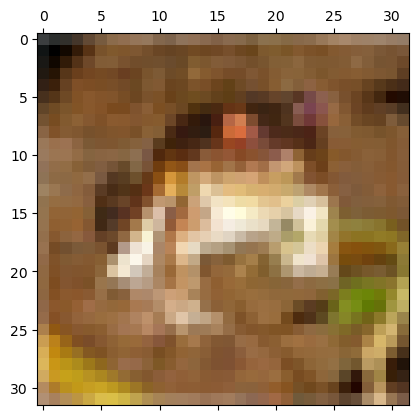

In [8]:
plt.matshow(x_train[0])

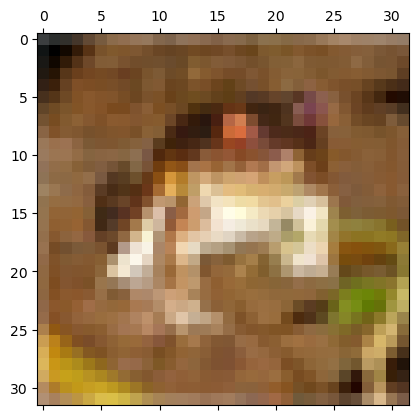

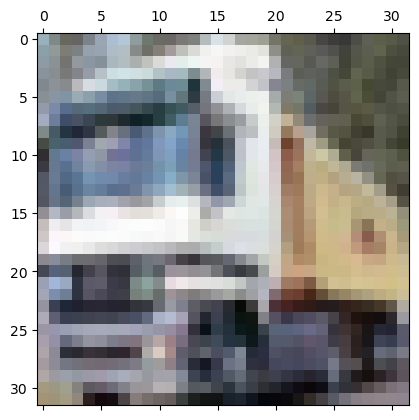

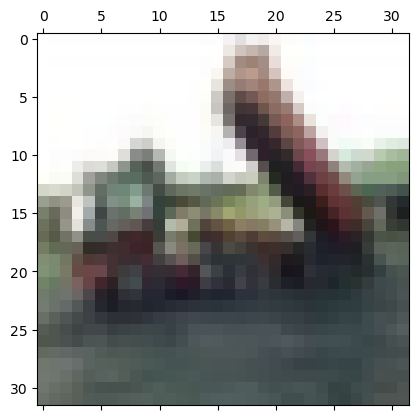

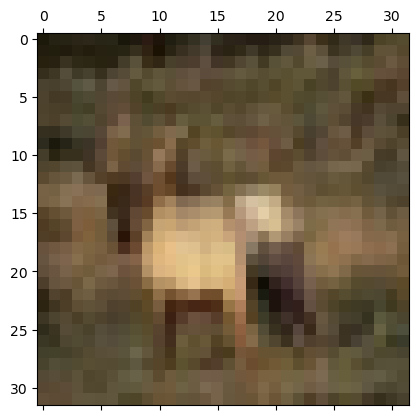

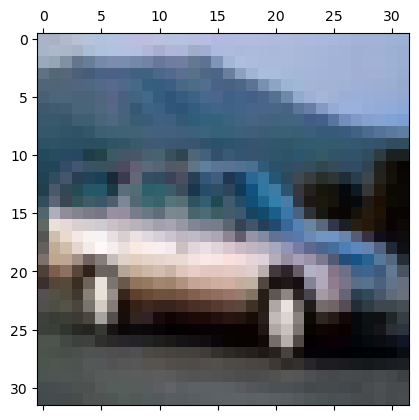

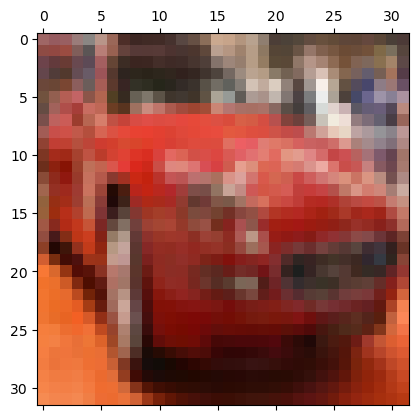

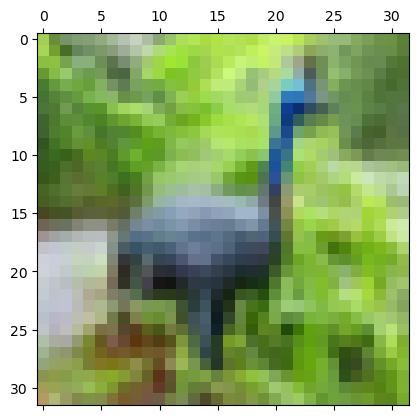

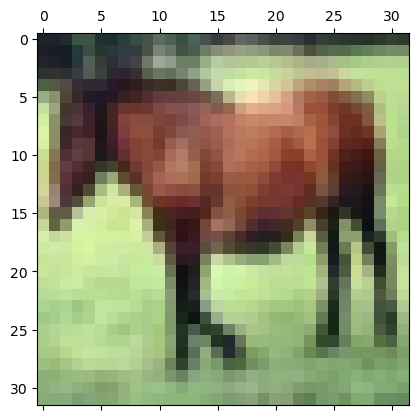

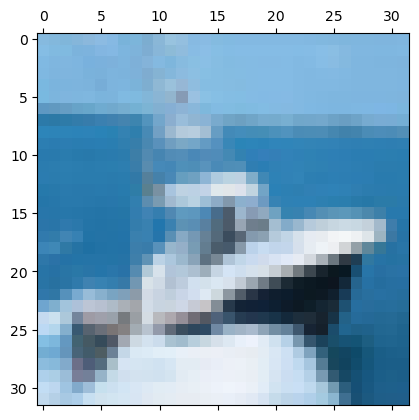

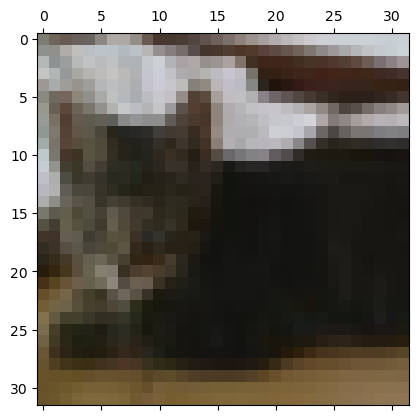

In [9]:
for i in range(10):
    plt.matshow(x_train[i])

In [10]:
# Data visualization
def plot_sample(index):
    plt.figure(figsize=(10,2))
    plt.imshow(x_train[index])

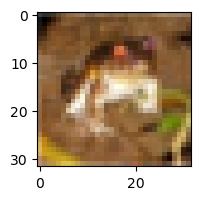

In [11]:
plot_sample(0)

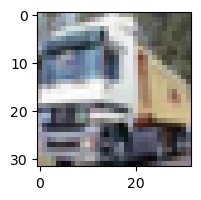

In [12]:
plot_sample(1)

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
#3 dimension=rgb=red green blue

In [16]:
x_train[0][0][0][1]

62

In [17]:
y_test.shape

(10000, 1)

In [18]:
y_train.shape

(50000, 1)

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
#becoz  y is labeeled
classes[y_train[3][0]]

'deer'

In [22]:
# classes[y_test[3][0]]

'airplane'

In [25]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [26]:
x_train=x_train/255.0
x_test=x_test/255.0

In [27]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [28]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [29]:
# one Hot encoding
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32')

y_test_categorical=keras.utils.to_categorical(
   y_test,num_classes=10,dtype='float32')


In [31]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
# model building
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train_categorical, epochs=1)

1563/1563 [==============================] - 123s 78ms/step - loss: 1.8145 - accuracy: 0.3547


In [36]:
model.evaluate(x_test,y_test_categorical)

313/313 [==============================] - 6s 20ms/step - loss: 1.6928 - accuracy: 0.3931


[1.6927714347839355, 0.39309999346733093]

In [38]:
#Let's make some predictions
y_pred=model.predict(x_test)

313/313 [==============================] - 6s 19ms/step


In [39]:
y_prediction=[np.argmax(i) for i in y_pred]

In [40]:
y_test_categorical[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [45]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [42]:
y_prediction[:3]

[3, 8, 8]

In [43]:
#one hot encoding
y_prediction_categorical=keras.utils.to_categorical(
y_prediction,num_classes=10,dtype='float32')

In [44]:
y_prediction_categorical[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [48]:
# confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediction)

Text(95.72222222222221, 0.5, 'Truth')

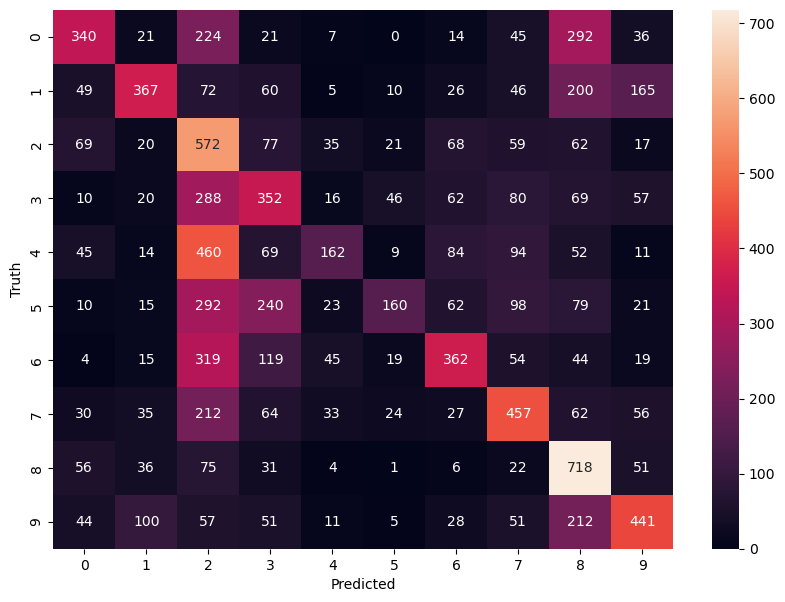

In [49]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')